# STAT207 Final Project - Case Study: Loan Approval Predictor

Group Member:

1. Cheng Ai(chengai2)
2. Haoyu Liu(haoyul11) 
3. Wan-Ting Lin(vivianl5)

In [2]:
#Imports here
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statsmodels.formula.api as smf, statsmodels.api as sm, scipy.stats as stats, math, sympy as sp, itertools
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, log_loss, confusion_matrix, mean_squared_error, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, LinearRegression, ElasticNet, Ridge, LogisticRegression
from numpy.linalg import LinAlgError
from scipy import stats

## 1. Introduction

### Motivation

In nowaday's financial environment, access to loans can significantly impact people making major life decisions, such as purchasing a home, etc. Many FinTech companies such as Upstart and Zest AI were found to conduct business under this background (IBM, 2025a). Predictive models that estimate whether a loan application will be approved or rejected can empower individuals with foresight about their financial eligibility, and help them make correct decision during application (Kim & DeVaney, 2020).

Our group was particularly interested in this issue when one of our members shared her personal story: her boyfriend recently received a full-time job offer which prompts them to consider buying a house together in the near future. However, they realize that being approved for a home loan could be challenging, especially without a clear understanding of how likely they are to get approved. Such an issue inspired us to explore whether a machine learning model could help.

### Target Users

- People who are planning to make a large purchase that relies on loan approval.
- Financial and mortgage companies might also find this model useful for pre-assessing applications before detailed review.

### Classifer Preference for Our Target Users

For people who are planning to make a large purchase that relies on loan approval, they might want the classifer is better at correctly predicting approvals. This is because a higher true positive rate(approved) can give them more confidence to stick to their plans or help them adjust their expectations and finiances accordingly. On the other hand, for financial companies, they might emphasis more on accurately identifying rejections to reduce risk.

### Primary Research Goal of Analysis: Prediction

The primary research goal of this project is to build a predictive model that will effectively predict `loan_status` (approved or rejected) for the new dataset. To achieve our goal, we will use a logistic regression model that incorporates at least five explanatory variables, including both categorical and numerical features as listed in the following:

- `person_age`
- `person_gender`
- `person_education`
- `person_income`
- `person_emp_exp`
- `person_home_ownership`
- `loan_amnt`
- `loan_intent`
- `loan_int_rate`
- `loan_percent_income`
- `cb_person_cred_hist_length`
- `credit_score`
- `previous_loan_defaults_on_file`

### Secondary Research Goal of Analysis: Interpretation + Descriptive Analytics

Beside building an accurate classifier for loan approval, we will first utilize data visualization to discover some data insights. We will also identify most predictive and important features that indicates whether to lend money to the applicants or not.

## 2. Dataset Discussion

The dataset used in this study comes from Kaggle(https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data) and was created using computer techniques based on real patterns found in public datasets like the Credit Risk dataset on Kaggle. It shows information from 45000 loan applications, with each row represents one person's application information such as age, gender, education level, etc. 

While the dataset covers many common loan situations, it doesn’t include every possible case, like people with unusual income sources or very complex financial histories. It is important to remember that though this dataset is useful for us to create a model; however, the results are not guaranteed.

The dataset includes the following features:

1. person_age: Age of the person.
2. person_gender: Gender of the person.
3. person_education: Highest education level.
4. person_income: Annual income.
5. person_emp_exp: Years of employment experience.
6. person_home_ownership: Home ownership status (e.g., rent, own, mortgage).
7. loan_amnt: Loan amount requested.
8. loan_intent: Purpose of the loan.
9. loan_int_rate: Loan interest rate.
10. loan_percent_income: Loan amount as a percentage of annual income.
11. cb_person_cred_hist_length: Length of credit history in years.
12. credit_score: Credit score of the person.
13. previous_loan_defaults_on_file: Indicator of previous loan defaults.
14. loan_status (target variable): Loan approval status: 1 = approved; 0 = rejected.

## 3. Dataset Cleaning
### 3.1 Dataset

1. Read the csv file into a dataframe and convert all implicit missing values in the columns that I intend to use to "NaN".
2. Show the number of rows and columns in the dataframe.

In [3]:
# Load the dataframe and deal with the missing values.
df = pd.read_csv('loan_data.csv', na_values=[""])

# Test code.
df.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# Show how many rows and columns are there in our dataframe.
df.shape

(45000, 14)

### 3.2 Dataset Cleaning

#### 3.2.1 Check for NaN values

After checking the NaN value, we found out there is no implicit and explicit value in our dataset. So, for now we didn't drop any value.

Furthermore, we also checked if there exist extremely small sample size group in categorical variable(threshold = 30). We confirmed that our dataset doesn't have the issue with categorical explanatory variable has some levels that only have a few observations.

In [5]:
# Check for what information is in the categorical variables.
cat = df.select_dtypes(include = 'object').columns.to_list()
for col in cat:
    print(df[col].unique())

['female' 'male']
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['No' 'Yes']


In [6]:
# Categorical variable sample size checking.
# df["person_gender"].value_counts() # Equally distribution.
# df["person_education"].value_counts() # No extremely small sample size group.
df["person_home_ownership"].value_counts() # "Other" 117.
# df["loan_intent"].value_counts() # No extremely small sample size group.
# df["previous_loan_defaults_on_file"].value_counts() # Equally distribution.

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [7]:
# Check for the NaN value.
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [1]:
# Drop NaN values.
# df.dropna()

#### 3.2.2 Outliers observation

By observing the pair plot, we can definitely find out there exists some outliers in our dataset. However, we don't want to delete these ouliers by simply eyeballing since it might not be rigurous enough. Hence, we didn't drop any outliers by eyeballing at this stage. Instead, we will perform a more comprehensive outlier dropping as our "other data cleaning" in the next part.

##### Outlier cleaning pros and cons evaluation

- One potential reason that we might want to drop the outliers here is that they can lead the logistic regression model to performs worse on predicting approval probability for a broader and non-outlier population.

- If we choose not to drop the outliers due to we think they are part of the real-world data and can contain useful information, then removing them could make the model less representative of the whole range of listings on applicants. To be more specific, if we include the potential important edge cases, it could have the power to influence the likelihood of a person being approved to have loan.


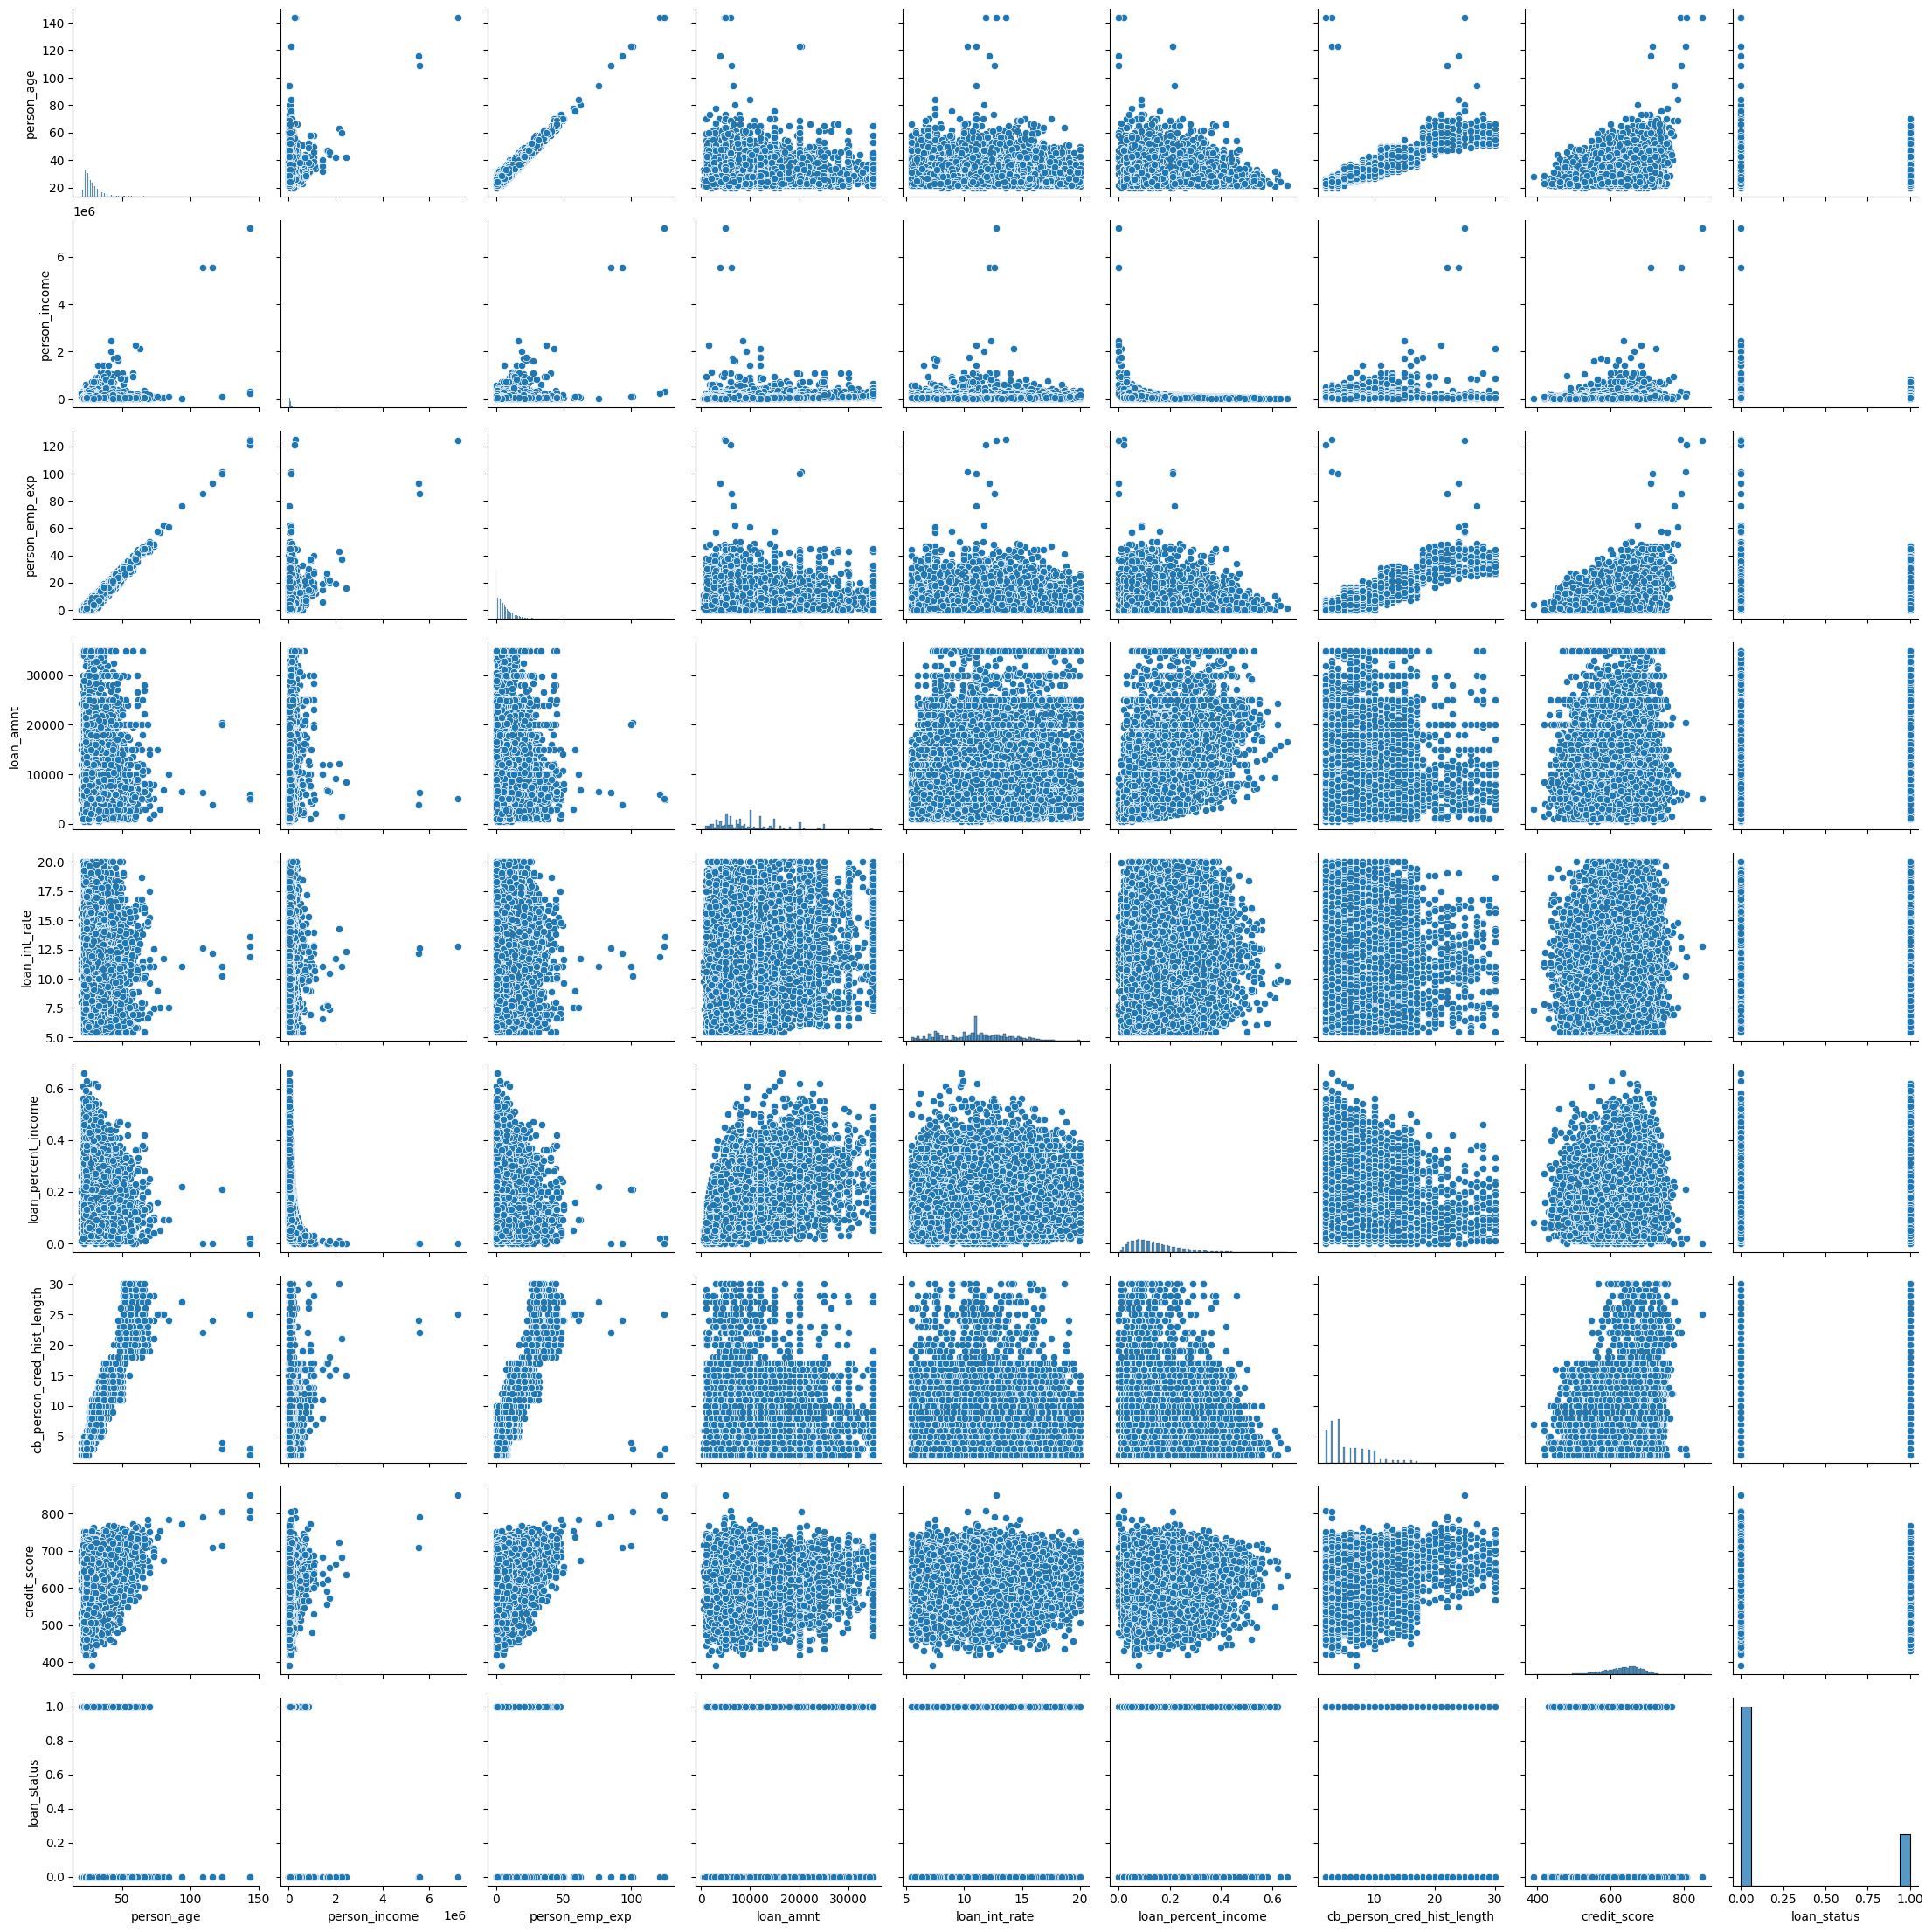

In [9]:
# Plot the pair plot to find out the outliers.
num_cols = df.select_dtypes(include = [np.number]).columns
sns.pairplot(df[num_cols])

#### 3.2.3 Other data cleaning: Whole dataset outliers dropping

To perfom a more rigorous data cleaning, we drop the data points that are outside the lower bound and upper bound as below.

In [10]:
# Drop the outliers by performing calculations.
def drop_outliers(col):
    q1, q3 = col.quantile([0.25,0.75])
    iqr = q3 - q1
    return col.where(col.between(q1 - 1.5 * iqr, q3 + 1.5 * iqr))

df_ex_num = df.select_dtypes(include = 'number').drop(columns = ['loan_status']).apply(drop_outliers)
df_num = pd.concat([df_ex_num, df['loan_status']], axis = 1)

# Test code.
# df_num.head(5)

### 3.3 Final Dataset

#### 3.3.1 Combine the categoriacl part with the numerical part of our dataset back together after dropping the outliers

In [11]:
# Categoriacl part of our dataset.
df_cat = df.select_dtypes(include = 'object')

# Test code.
# df_cat.head(5)

In [12]:
# Combine the categoriacl part with the numerical part of our dataset back together after dropping the outliers.
df_final = pd.concat([df_cat, df_num], axis = 1)

# Test code.
# df_final.head(5)

#### 3.3.2 Drop the outliers and show how many rows that we dropped

In [13]:
# Drop the outliers.
df_final = df_final.dropna().reset_index(drop = True)

# Test code.
# df_final.head(5)

# Calculation of how many rows that we dropped.
len(df) - len(df_final)

7451

## 4. Preliminary Analysis
### 4.1 Categorical Variable Relationships with Loan Status

There were many potential categorical explanatory variables that we could use in our logistic regression model that predicts the probability that loan status is approved. However, fitting each of models with all of these explanatory variables would become too computationally burdensome. Hence, we might consider preliminarily weeding out potential categorical explanatory that independently do not appear to bring enough predictive power to the logistic regression model.

"person_gender" and "person_education" seem to have weak relationship between the loan status and these two features, because the distributions for loan status do not look different.

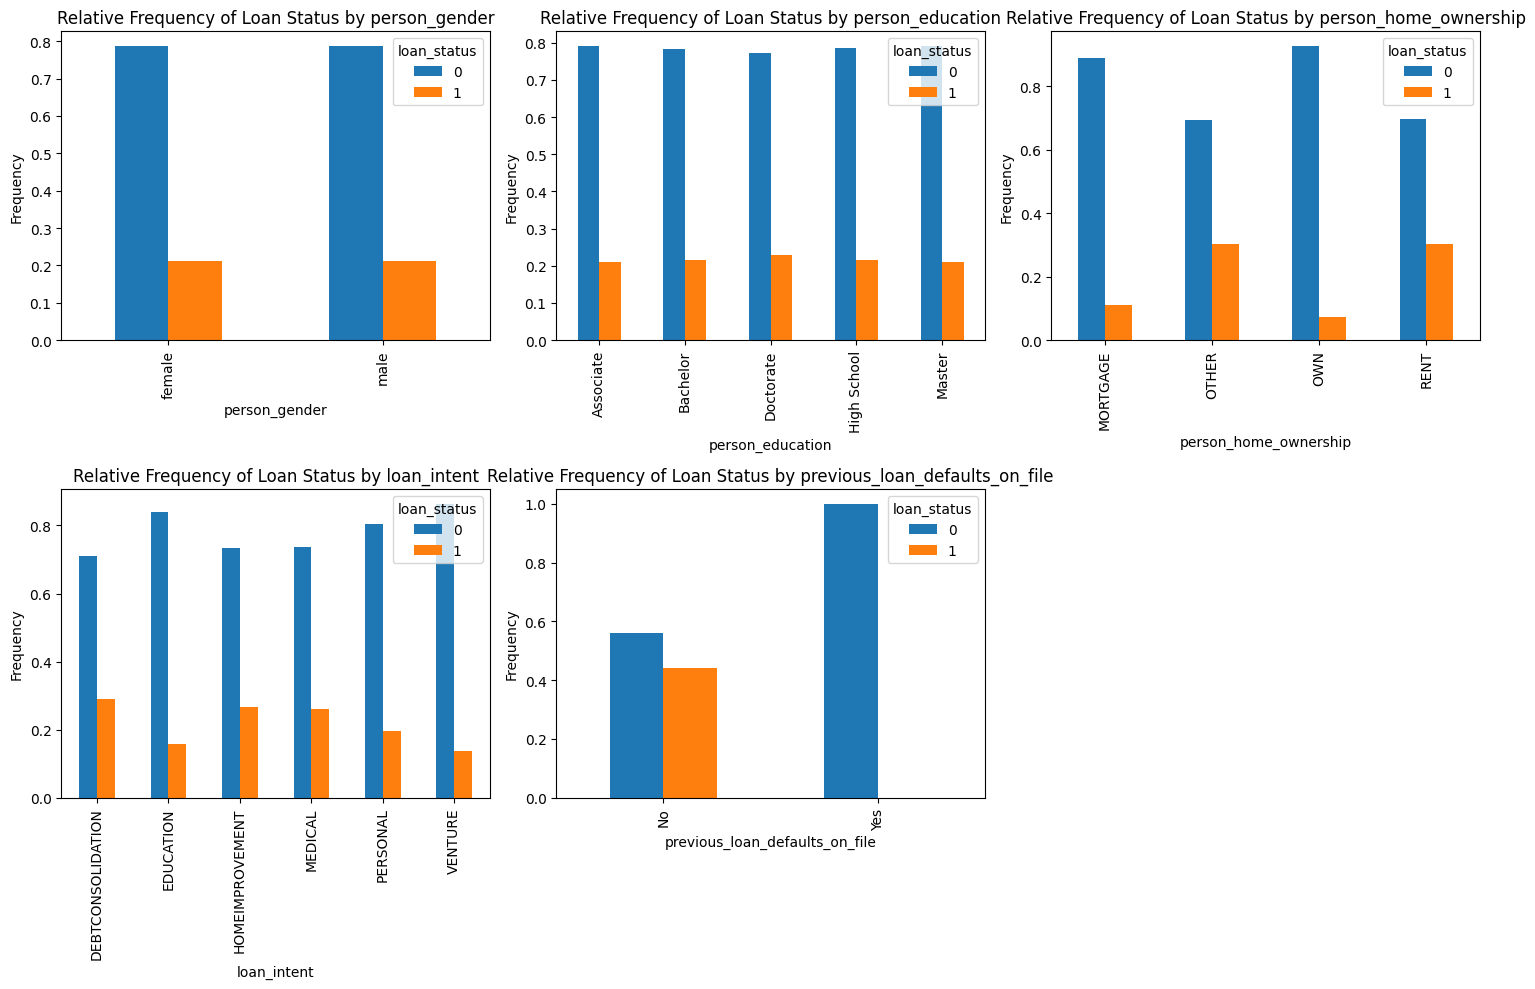

In [14]:
### Catgorical Variables
cat_feats = df_final.select_dtypes(include = 'object').columns.tolist()
n = len(cat_feats)
ncols = 3
nrows = (n + ncols - 1) // ncols
fig, axs = plt.subplots(nrows, ncols, figsize = (15, 10))
axs = axs.flatten()

for ax, col in zip(axs, cat_feats):
    table = pd.crosstab(df_final[col], df_final["loan_status"], normalize = "index")
    table.plot.bar(ax = ax)
    
    # Plot the labels properly.
    ax.set_title(f"Relative Frequency of Loan Status by {col}")
    ax.set_ylabel("Frequency")

for ax in axs[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

### 4.2 Numerical Variable Relationships with Loan Status

There were many potential numerical explanatory variables that we could use in our logistic regression model that predicts the probability that loan status is approved. However, fitting each of models with all of these explanatory variables would become too computationally burdensome. Hence, we might consider preliminarily weeding out potential categorical explanatory that independently do not appear to bring enough predictive power to the logistic regression model.

"person_income", "loan_int_rate", and "loan_percent_income" do have some associations with "loan_status" since their box plots are the most seperated from each other. So, they should definitely be kept.

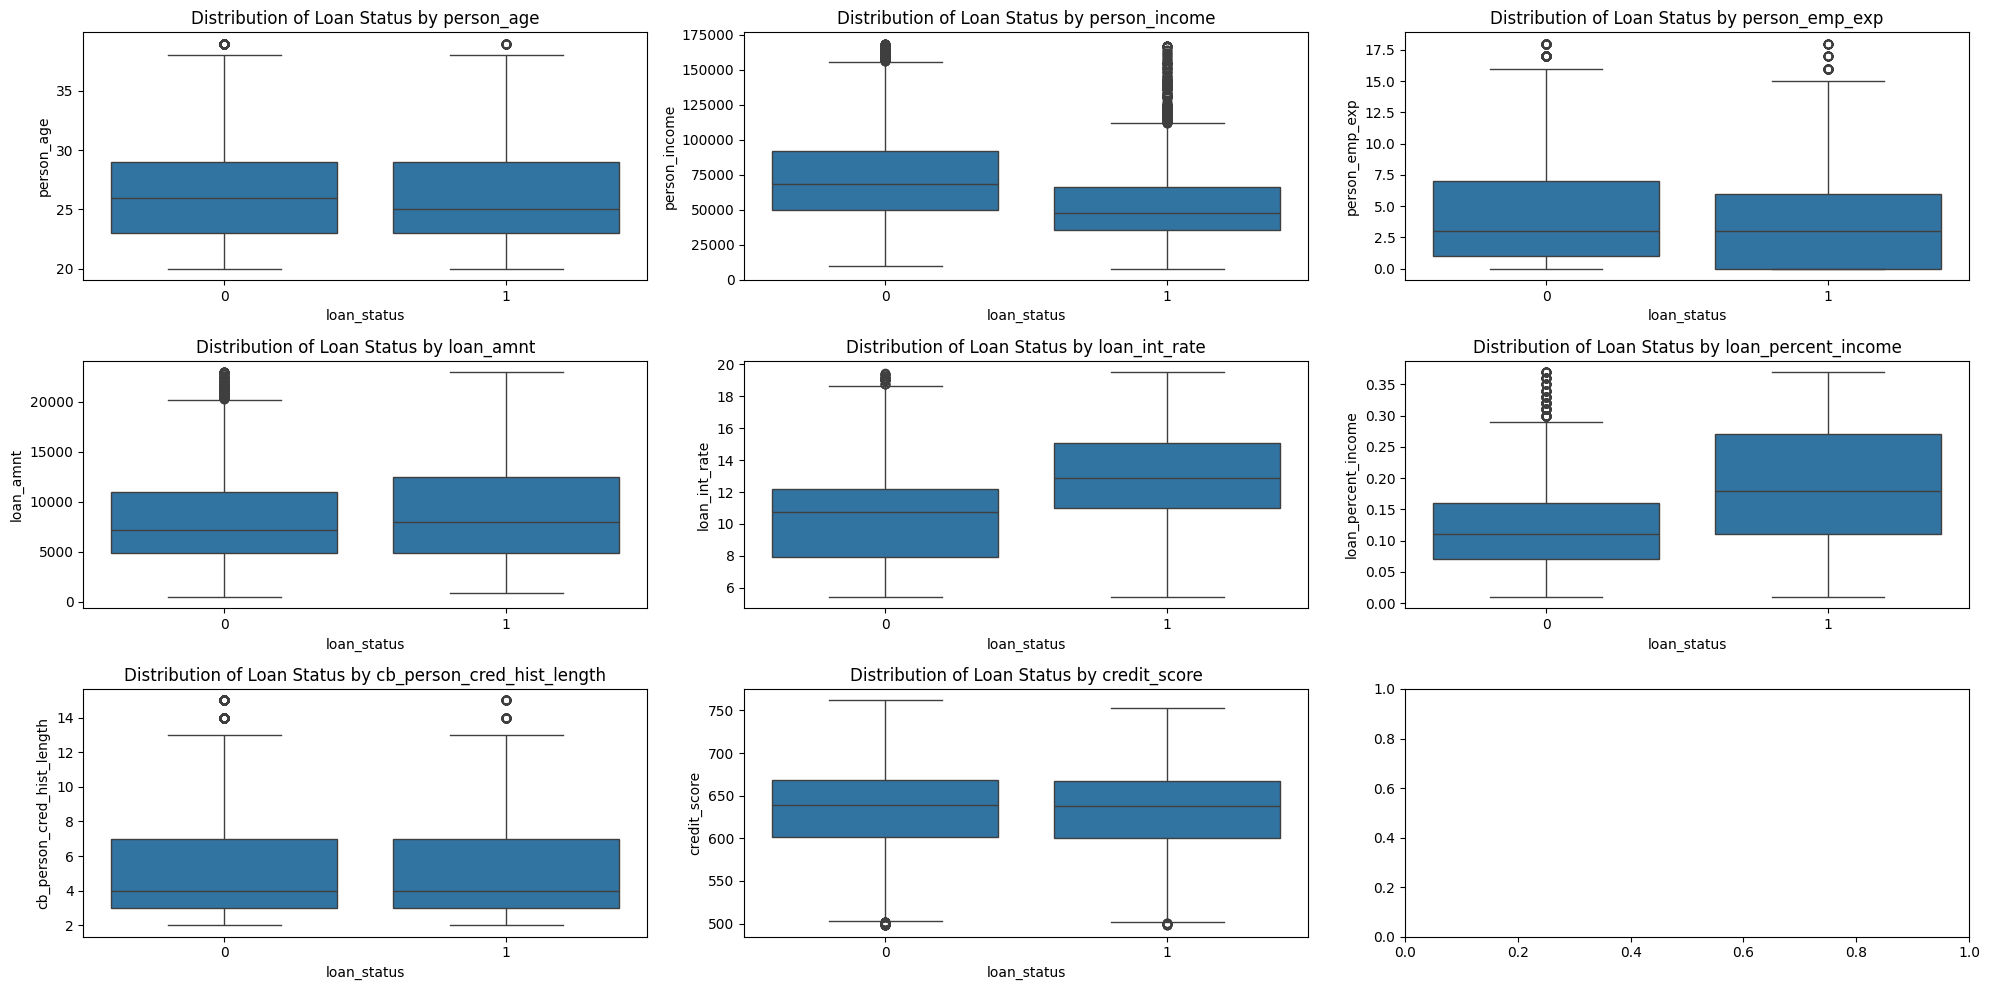

In [15]:
# List of the numerical variable.
NUM_VAR1 = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]

# Method learned from IS445.
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()

# # Plot the boxplot for "Age" variable.
# sns.boxplot(x="loan_status", y=NUM_VAR1[0], data=df_final, ax=axes[0])
# axes[0].set_title("Distribution of Loan Status by Age")

# # Plot the boxplot for "Income" variable.
# sns.boxplot(y=NUM_VAR1[1], x="loan_status", data=df_final, ax=axes[1])
# axes[1].set_title("Distribution of Loan Status by Income")

# # Plot the boxplot for "Income" variable.
# sns.boxplot(y=NUM_VAR1[2], x="loan_status", data=df_final, ax=axes[2])
# axes[2].set_title("Distribution of Loan Status by Years of Employment Experience")

# Plot the plots using for loop.
# Method learned from IS445.
for i, var, in enumerate(NUM_VAR1):
    sns.boxplot(x="loan_status", y=var, data=df_final, ax=axes[i])

    # Plot the labels properly.
    axes[i].set_title(f"Distribution of Loan Status by {var}")

# Adjust the layout.
plt.tight_layout()
plt.show()

### 4.3 Multicollinearlty Asscessment

Is there an association between the numerical variables pairs(`person_age`, `person_income`, `person_emp_exp`, `loan_amnt`, `loan_int_rat`, `loan_percent_income`, `cb_person_cred_hist_length`, and `credit_score`) in this dataset?

Yes, since we can see at least one pair of explanatory variables pair will have value greater than the threshold(0.7).

In [16]:
### Multicollinearity
df_final.select_dtypes(include = 'number').drop(columns = ['loan_status']).corr()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
person_age,1.000000,0.094028,0.904600,0.039673,0.007252,-0.027750,0.817704,0.125892
person_income,0.094028,1.000000,0.075938,0.349259,-0.066230,-0.375784,0.058728,0.011701
person_emp_exp,0.904600,0.075938,1.000000,0.031978,0.012736,-0.022554,0.748459,0.137816
loan_amnt,0.039673,0.349259,0.031978,1.000000,0.086414,0.646870,0.028580,0.003135
loan_int_rate,0.007252,-0.066230,0.012736,0.086414,1.000000,0.111943,0.017508,0.006920
loan_percent_income,-0.027750,-0.375784,-0.022554,0.646870,0.111943,1.000000,-0.011346,-0.006627
cb_person_cred_hist_length,0.817704,0.058728,0.748459,0.028580,0.017508,-0.011346,1.000000,0.109278
credit_score,0.125892,0.011701,0.137816,0.003135,0.006920,-0.006627,0.109278,1.000000


<Axes: >

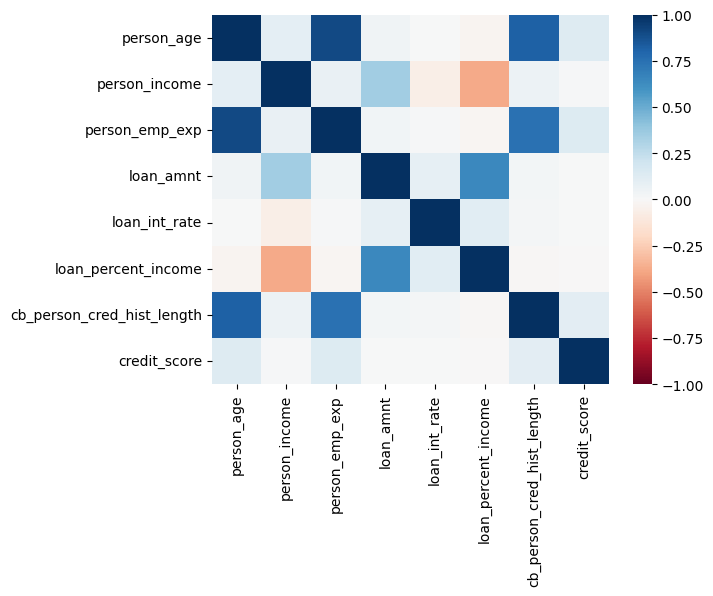

In [17]:
# Plot the heatmap.
sns.heatmap(df_final.select_dtypes(include = 'number').drop(columns = ['loan_status']).corr(), vmin=-1, vmax=1, cmap="RdBu")

### 4.4 Finding Interactions between Categorical and Numerical Explanatory Variable Pairs

For every categorical explanatory variable and numerical explanatory variable pair in the dataframw, evaluate if there is an interaction between these two terms in how they impact the predicted `loan_status` response variable. Which one of these categorical explanatory variable and numerical explanatory variable pairs has the weakest interaction?

By observing the following interaction plots, we can see that interactions such as "person_age" and "person_gender" and "person_age" and "previous_loan_defaults_on_file" are having weak interactions since their slopes are the least different from each other. However, since we have lots of features and as a result that we need to plot 40 plots in this section. This will cost a lot of time to process it and will be tedious for others to read our jupyter notebook. Thus, we only showed some of the plots here.

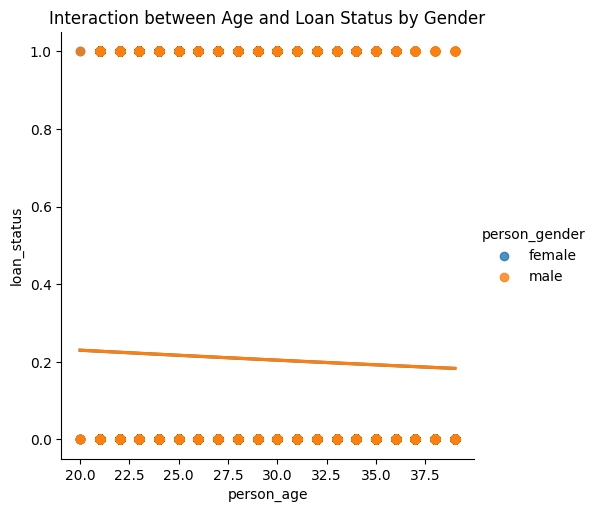

In [18]:
# Plot 1.
sns.lmplot(x="person_age", y="loan_status", hue="person_gender", data=df_final, logistic=True, ci=False)

# Plot the label properly.
plt.title("Interaction between Age and Loan Status by Gender")
plt.show()

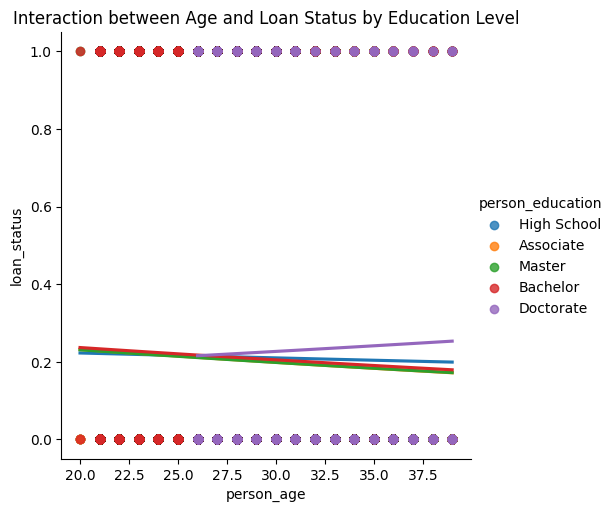

In [19]:
# Plot 2.
sns.lmplot(x="person_age", y="loan_status", hue="person_education", data=df_final, logistic=True, ci=False)

# Plot the label properly.
plt.title("Interaction between Age and Loan Status by Education Level")
plt.show()

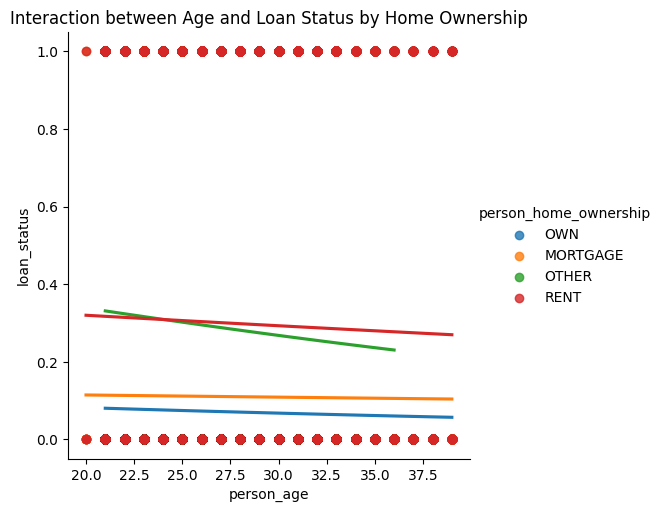

In [20]:
# Plot 3.
sns.lmplot(x="person_age", y="loan_status", hue="person_home_ownership", data=df_final, logistic=True, ci=False)

# Plot the label properly.
plt.title("Interaction between Age and Loan Status by Home Ownership")
plt.show()

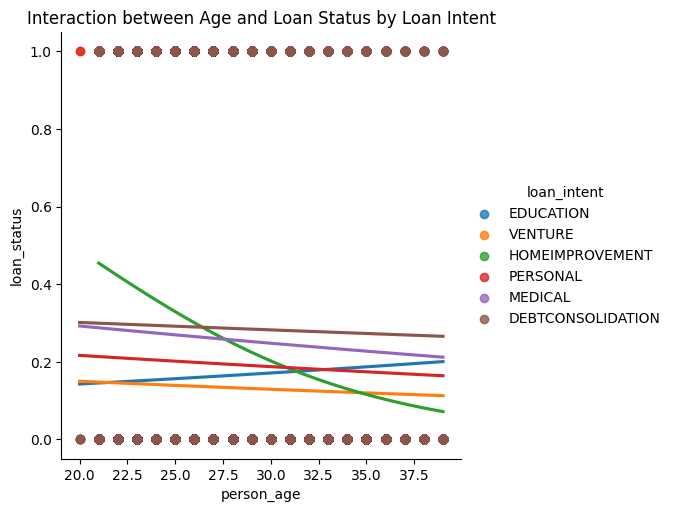

In [21]:
# Plot 4.
sns.lmplot(x="person_age", y="loan_status", hue="loan_intent", data=df_final, logistic=True, ci=False)

# Plot the label properly.
plt.title("Interaction between Age and Loan Status by Loan Intent")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


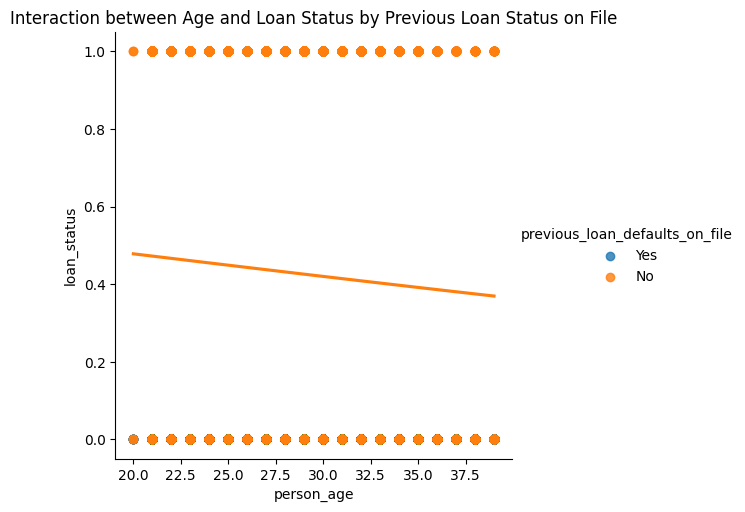

In [22]:
# Plot 5.
sns.lmplot(x="person_age", y="loan_status", hue="previous_loan_defaults_on_file", data=df_final, logistic=True, ci=False)

# Plot the label properly.
plt.title("Interaction between Age and Loan Status by Previous Loan Status on File")
plt.show()

In [ ]:
# The rest of the plots.
# sns.lmplot(x="person_income", y="loan_status", hue="person_gender", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="person_income", y="loan_status", hue="person_education", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="person_income", y="loan_status", hue="person_home_ownership", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="person_income", y="loan_status", hue="loan_intent", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="person_income", y="loan_status", hue="previous_loan_defaults_on_file", data=df_final, logistic=True, ci=False)

# sns.lmplot(x="person_emp_exp", y="loan_status", hue="person_gender", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="person_emp_exp", y="loan_status", hue="person_education", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="person_emp_exp", y="loan_status", hue="person_home_ownership", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="person_emp_exp", y="loan_status", hue="loan_intent", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="person_emp_exp", y="loan_status", hue="previous_loan_defaults_on_file", data=df_final, logistic=True, ci=False)

# sns.lmplot(x="loan_amnt", y="loan_status", hue="person_gender", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_amnt", y="loan_status", hue="person_education", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_amnt", y="loan_status", hue="person_home_ownership", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_amnt", y="loan_status", hue="loan_intent", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_amnt", y="loan_status", hue="previous_loan_defaults_on_file", data=df_final, logistic=True, ci=False)

# sns.lmplot(x="loan_int_rate", y="loan_status", hue="person_gender", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_int_rate", y="loan_status", hue="person_education", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_int_rate", y="loan_status", hue="person_home_ownership", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_int_rate", y="loan_status", hue="loan_intent", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_int_rate", y="loan_status", hue="previous_loan_defaults_on_file", data=df_final, logistic=True, ci=False)

# sns.lmplot(x="loan_percent_income", y="loan_status", hue="person_gender", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_percent_income", y="loan_status", hue="person_education", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_percent_income", y="loan_status", hue="person_home_ownership", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_percent_income", y="loan_status", hue="loan_intent", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="loan_percent_income", y="loan_status", hue="previous_loan_defaults_on_file", data=df_final, logistic=True, ci=False)

# sns.lmplot(x="cb_person_cred_hist_length", y="loan_status", hue="person_gender", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="cb_person_cred_hist_length", y="loan_status", hue="person_education", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="cb_person_cred_hist_length", y="loan_status", hue="person_home_ownership", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="cb_person_cred_hist_length", y="loan_status", hue="loan_intent", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="cb_person_cred_hist_length", y="loan_status", hue="previous_loan_defaults_on_file", data=df_final, logistic=True, ci=False)

# sns.lmplot(x="credit_score", y="loan_status", hue="person_gender", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="credit_score", y="loan_status", hue="person_education", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="credit_score", y="loan_status", hue="person_home_ownership", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="credit_score", y="loan_status", hue="loan_intent", data=df_final, logistic=True, ci=False)
# sns.lmplot(x="credit_score", y="loan_status", hue="previous_loan_defaults_on_file", data=df_final, logistic=True, ci=False)

In [ ]:
# If we want to explore all the plots, here is the code with for loops:
# num_feats = df_final.select_dtypes(include = 'number').drop(columns = ['loan_status']).columns.tolist()
# num_pair = list(itertools.combinations(num_feats, 2))
# for cat in cat_feats:
#     for x, y in num_pair:
#         sns.lmplot(
#             data = df_final,
#             x = x, y = y,
#             hue = cat,
#             logistic = True, 
#             ci = False
#         )
#         plt.subplots_adjust(top = 0.85)
#         plt.show()

## 5. Model Data Preprocessing

Since our response variable has already been converted to 0/1 form, we do not need to further deal with it and solely need to create feature matrix and target array, perform scaling, and convert the indicator variables.

In [25]:
# Check the form of our response variable.
df_final["loan_status"]

0        0
1        1
2        1
3        1
4        1
        ..
37544    1
37545    1
37546    1
37547    1
37548    1
Name: loan_status, Length: 37549, dtype: int64

In [26]:
# Create the feature matrix and target array.
df_feature = df_final.drop(columns = ['loan_status'], axis = 1)
df_target = df_final['loan_status']

# Test code.
# df_feature
# df_target

In [27]:
# Scaling.
scaler = StandardScaler()
num_vars = df_feature.select_dtypes(include = 'number').columns
df_feature[num_vars] = scaler.fit_transform(df_feature[num_vars])

# Test code.
# df_feature.head(5)
# df_feature[num_vars].std()

In [28]:
# Convert the indicator variable to the correct form.
df_feature = pd.get_dummies(df_feature, drop_first = True) * 1

# Test code.
# df_feature.head(5)

## 6. Feature Selection with k-Fold Cross-Validation

In order to make more robust estimates as to how a given model might perform when classifying observations in new dataset, we will perform a backwards elimination algorithm that tries to select the logistic regression model with the highest average test AUC in the k=5 fold cross-validation.

In [29]:
### Backward Elimination
def Backward_Elimination(X, y, model):
    features = list(X.columns)
    best_score = cross_val_score(model, X[features], y, cv = 5, scoring = 'roc_auc').mean()
    best_features = features.copy()

    while len(features) > 1:
        scores = {
            feat: cross_val_score(
                      model,
                      X[[f for f in features if f != feat]],
                      y,
                      cv = 5,
                      scoring = 'roc_auc'
                  ).mean()
            for feat in features
        }
        feat_to_remove, score_max = max(scores.items(), key = lambda item: item[1])

        if score_max >= best_score:
            best_score = score_max
            features.remove(feat_to_remove)
            best_features = features.copy()
        else:
            break

    return best_features, best_score

In [30]:
# Print out the results.
best_feats, best_auc = Backward_Elimination(df_feature, df_target, LogisticRegression())
print(best_feats)
print(f"Highest Average Test AUC: {round(best_auc, 4)}")

['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes']
Highest Average Test AUC: 0.9522


## 7. Best Model Discussion

### 7.1 Best Model Equation

Write out the equation for the model that had the highest average test AUC.

By doing backward elimination and k-fold cross-vildation, we can find out that when having the features "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score", "person_home_ownership", "loan_intent", and "previous_loan_defaults_on_file" will result in the highest average test AUC(0.9522). We also want to mention that the reason why we didn't choose the model with interaction terms is because using the test set for model selection leads to overfitting and biased performance estimates.

The equation is shown as follow: $\hat{p} = $ 

$\frac{1}{1 + e^{-(-0.4320 - 0.7865loan_{-}amnt + 0.9611oan_{-}int_{-}rate + 1.4034loan_{-}percent_{-}income - 0.0524cb_{-}person_{-}cred_{-}hist_{-}length - 0.3907credit_{-}score - 1.5905person_{-}home_{-}ownership{[T.OWN]} + 0.5756person_{-}home_{-}ownership{[T.RENT]} - 0.9403loan_{-}intent{[T.EDUCATION]} - 0.3521loan_{-}intent{[T.MEDICAL]} - 0.7212loan_{-}intent{[T.PERSONAL]} - 1.2680loan_{-}intent{[T.VENTURE]} - 7.4612pervious_{-}loan_{-}defaults_{-}on_{-}files{[T.YES]})}}$

Furthermore, since we have already scaled our dataset in the previous part, we can then interpret the magnitudes of the slopes as indicating how important the corresponding explanatory variable or indicator is when it comes to predicting our response variable in the model. For instance, the indicator "previous_loan_defaults_on_file_Yes" has the largest coefficient which means that it is the most important feature in our model.

In [31]:
# Combine the feature matrix and target array back together.
df_model = pd.concat([df_feature, df_target], axis = 1)

# Test code.
# df_model.head(5)

In [32]:
# Perform train-test-split.
df_train, df_test = train_test_split(df_model, test_size = 0.2, random_state = 207)

# Drop the unnecessary column.
feature_train = df_train.drop(columns = ['loan_status'], axis = 1)
feature_test = df_test.drop(columns = ['loan_status'], axis = 1)
target_train = df_train['loan_status']
target_test = df_test['loan_status']

# Test code.
# df_train.head(5)
# df_test.head(5)
# feature_train.head(5)
# feature_test.head(5)
# target_train.head(5)
# target_test.head(5)


In [33]:
### Fit the model
best_model = LogisticRegression()
feature_fit = feature_train[['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes']]
best_model.fit(feature_fit, target_train)

LogisticRegression()

In [34]:
# Print out the model summary such as intercept and coefficents.
best_model.intercept_
if len(best_model.intercept_) == 1:
    print(f"Intercept: {round(best_model.intercept_[0], 4)}\n")

coefs = best_model.coef_[0]
coef_series = pd.Series(coefs, index = feature_fit.columns)
print("Coeffcients For Each Explanatory Variables:")
print(coef_series)

Intercept: -0.432

Coeffcients For Each Explanatory Variables:
loan_amnt                            -0.786525
loan_int_rate                         0.961102
loan_percent_income                   1.403441
cb_person_cred_hist_length           -0.052421
credit_score                         -0.390745
person_home_ownership_OWN            -1.590522
person_home_ownership_RENT            0.575558
loan_intent_EDUCATION                -0.940334
loan_intent_MEDICAL                  -0.352075
loan_intent_PERSONAL                 -0.721167
loan_intent_VENTURE                  -1.267951
previous_loan_defaults_on_file_Yes   -7.461184
dtype: float64


### 7.2 Test Dataset ROC Curve

Now, we are going to create an ROC curve for this logistic regression model and the test dataset, and also calculate the AUC of this ROC curve.

By achieving the 0.8317 AUC value, we assume that our best model perform quite well since it is close to the ideal scenario AUC(1).

In [35]:
# Calculate the model predictive probabilities for test dataset.
y_true = target_test
feature_test = feature_test[['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes']]
y_pred = best_model.predict(feature_test)

In [36]:
# Calculate the FPR and TPR for many predictive probability thresholds.
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the AUC value.
roc_auc = roc_auc_score(y_true, y_pred)
print(round(roc_auc, 4))

0.8317


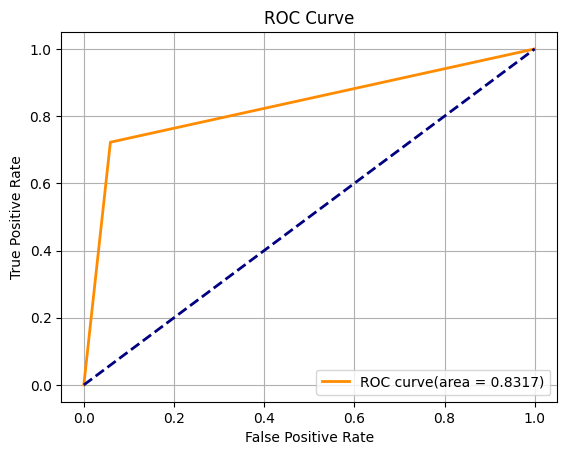

In [37]:
# Plot the ROC curve.
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve(area = " + str(round(roc_auc, 4)) + ")")
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Display the plot.
plot_roc(fpr, tpr, roc_auc)

In [ ]:
# # Plot the more detailed ROC curve.
# def plot_roc(fpr, tpr, auc, lw=2):
#     plt.figure(figsize=(16, 16))
#     plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve(area = " + str(round(roc_auc, 4)) + ")")
#     plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
#     plt.title("ROC Curve")
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.legend(loc="lower right")

#     # Make the plot become more detailed.
#     ticks = np.arange(0, 1.01, 0.01)
#     plt.xticks(ticks, rotation=90)
#     plt.yticks(ticks)
#     plt.grid(True)
#     plt.show()

# # Display the plot.
# plot_roc(fpr, tpr, roc_auc)

### 7.3 Multicollinearity Asscessment

Do the remaining explanatory variables in our model exhibit an issue with multicollinearity?

No, since we don't see any explanatory variables pair that have correlation value greater than the threshold(0.7).

In [38]:
NUM_VAR2 = ["loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]
df_feature[NUM_VAR2].corr()

,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
loan_amnt,1.000000,0.086414,0.646870,0.028580,0.003135
loan_int_rate,0.086414,1.000000,0.111943,0.017508,0.006920
loan_percent_income,0.646870,0.111943,1.000000,-0.011346,-0.006627
cb_person_cred_hist_length,0.028580,0.017508,-0.011346,1.000000,0.109278
credit_score,0.003135,0.006920,-0.006627,0.109278,1.000000


<Axes: >

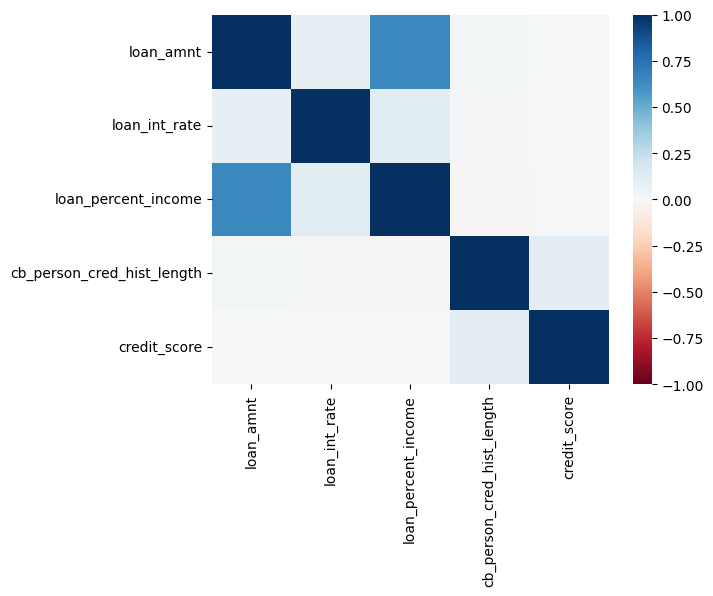

In [39]:
# Plot the heatmap.
sns.heatmap(df_feature[NUM_VAR2].corr(), vmin=-1, vmax=1, cmap="RdBu")

### 7.4 Overfitting Asscessment

Does the fact that this is our "best model" suggest that some of our explanatory variables were overfitting the model?

We don't think some of our explanatory variables would result in our best model overfitting. This is because our best model is more parsimonious due to its lower AIC value.

In [40]:
# Rename some columns.
df_train.rename(columns={"person_education_High School": "person_education_High_School", "loan_status": "y"}, inplace=True)

# Fit the full model.
full_formula = "y~person_age+person_income+person_emp_exp+loan_amnt+loan_int_rate+loan_percent_income+cb_person_cred_hist_length+credit_score+person_gender_male+person_education_Bachelor+person_education_Doctorate+person_education_High_School+person_education_Master+person_home_ownership_OTHER+person_home_ownership_OWN+person_home_ownership_RENT+loan_intent_EDUCATION+loan_intent_HOMEIMPROVEMENT+loan_intent_MEDICAL+loan_intent_PERSONAL+loan_intent_VENTURE+previous_loan_defaults_on_file_Yes"
log_full_model = smf.logit(formula=full_formula, data=df_train).fit()

# Fit our best model.
best_formula = "y~loan_amnt+loan_int_rate+loan_percent_income+cb_person_cred_hist_length+credit_score+person_home_ownership_OWN+person_home_ownership_RENT+loan_intent_EDUCATION+loan_intent_MEDICAL+loan_intent_PERSONAL+loan_intent_VENTURE+previous_loan_defaults_on_file_Yes"
log_best_model = smf.logit(formula=best_formula, data=df_train).fit(maxiter=35)

         Current function value: 0.218908
         Iterations: 35


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.219112
         Iterations: 35


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
# Print out the AIC values.
print(f"Full Model AIC: {round(log_full_model.aic, 2)}")
print(f"Best Model AIC: {round(log_best_model.aic, 2)}")

Full Model AIC: 13197.54
Best Model AIC: 13189.79


### 7.5 Best Predictive Probability Threshold

By observing the ROC curve, we can find out the point that TPR equals to 0.72 and FPR equals to 0.06 is the closest one to the ideal point(TPR=1, FPR=0). This point is desired for applicants since its TPR is high and FPR is acceptable. Then, by performing somes calculation, we can find out the threshold of this point is 0.495.

However, if we want to make the TPR even higher, we can further adjust the threshold to make it smaller. But, doing so will also result in FPR become higher. Such trade-off is something we need to consider more!

In [42]:
# Method comes from course material and lab12 assignment.
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1 * (pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({"threshold": [thresh], "FPR": [fpr], "TPR": [tpr]})

In [43]:
# Print out the result.
ps = np.arange(0.1, 0.505, step=0.005)

# Predict the probabilities.
y_prob = best_model.predict_proba(feature_test)[:, 1]

# Append the data in to the dataframe.
res = []
for p in ps:
    res.append(fpr_tpr_thresh(y_true, y_prob, p))

pd.concat(res, axis=0, ignore_index=True)

,threshold,FPR,TPR
0,0.100,0.236255,0.976147
1,0.105,0.232511,0.973700
2,0.110,0.228085,0.971865
3,0.115,0.222979,0.968807
4,0.120,0.219915,0.966972
...,...,...,...
76,0.480,0.064511,0.739450
77,0.485,0.063660,0.735780
78,0.490,0.062638,0.731498
79,0.495,0.061106,0.727829


## 8. Additional Analysis/Insight

One interesting observation was that we had seen differences in the boxplot for `person_income`, `loan_int_rate`, and `loan_percent_income` in section 4.2. We would like to take a step further to use statistical hypothesis testing, t-test in particular, for these features.

The result is expected, since we can already by eyeballing. The p-value verify our observation that the data for approved applicants and rejected applicants are significantlt different on these three features. However, not all three features are selected in the final model. This might be due to the fact that when looking at these feature one at a time, the two groups, approved vs. rejected, have significant differences. Yet when looking all the features, there might exist interaction or multicollinearity which will prevent the algorithm to select all the features as the final model's predictive features. 

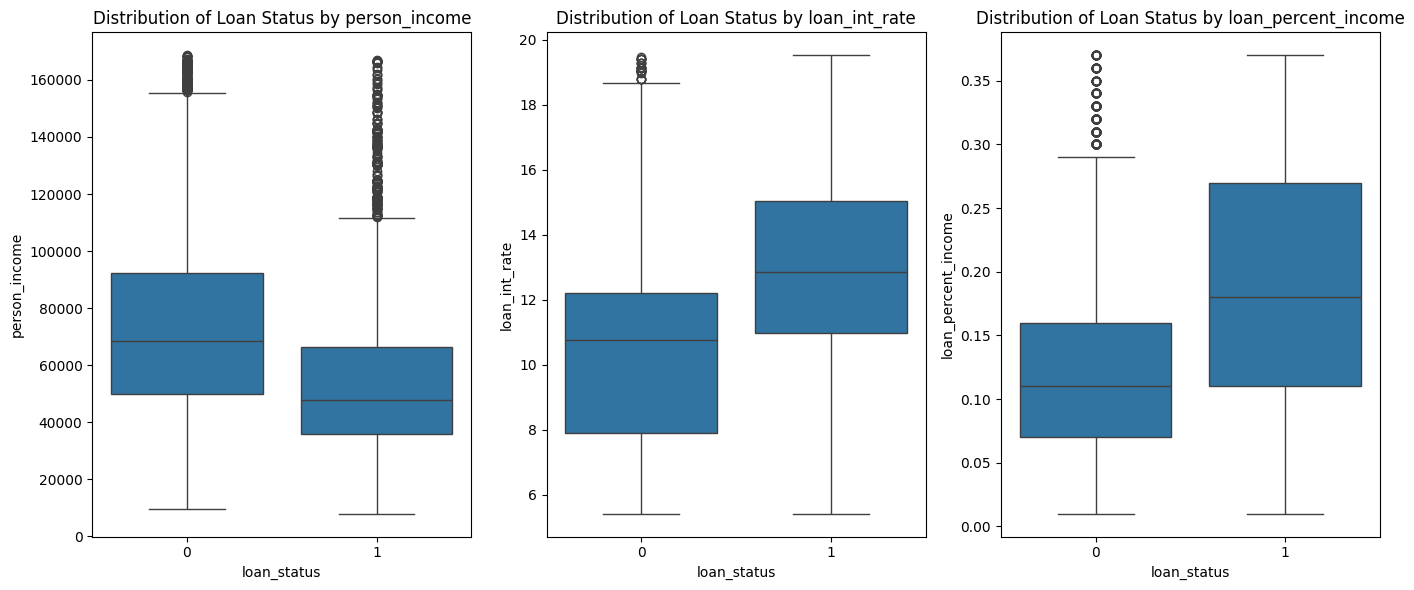

In [44]:
# List of the numerical variable that has differences in box plot.
NUM_VAR2 = ["person_income", "loan_int_rate", "loan_percent_income"]

# Method learned from IS445.
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
axes = axes.flatten()

# Plot the plots using for loop.
# Method learned from IS445.
for i, var, in enumerate(NUM_VAR2):
    sns.boxplot(x="loan_status", y=var, data=df_final, ax=axes[i])

    # Plot the labels properly.
    axes[i].set_title(f"Distribution of Loan Status by {var}")

# Adjust the layout.
plt.tight_layout()
plt.show()

In [45]:
# Perform t test for feature "person_income".
group_0 = df_final[df_final["loan_status"] == 0]["person_income"]
group_1 = df_final[df_final["loan_status"] == 1]["person_income"]

# Method comes from STAT107.
t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
print(f"p-value for person_income: {p_value}")

p-value for person_income: 0.0


In [46]:
# Perform t test for feature "loan_int_rate".
group_0 = df_final[df_final["loan_status"] == 0]["loan_int_rate"]
group_1 = df_final[df_final["loan_status"] == 1]["loan_int_rate"]

# Method comes from STAT107.
t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
print(f"p-value for loan_int_rate: {p_value}")

p-value for loan_int_rate: 0.0


In [47]:
# Perform t test for feature "loan_percent_income".
group_0 = df_final[df_final["loan_status"] == 0]["loan_percent_income"]
group_1 = df_final[df_final["loan_status"] == 1]["loan_percent_income"]

# Method comes from STAT107.
t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
print(f"p-value for loan_percent_income: {p_value}")

p-value for loan_percent_income: 0.0


## 9. Conclusion

### 9.1 Recommendation
We would recommend users to use our model as a pre-screening simulator for the loan application approval. We have a AUC of 0.8317, which indicates the robustness of our model.

### 9.2 Shortcomings
The limitation of this model would be 
(1) The age range of the applicants is mostly between 20 to 30 years old, so the model might not be predictive if the user's age does not fall into this range. 
(2) The size of the training data could be expanded to ensure a more robust prediction. 

### 9.3 Future Work
Based on the above shortcomings, the future steps would be:

(1) collect more data to make the model more robust

(2) try out other models(such as decision tree, support vector machine, and neural network) besides logistice regression to improve the classification performance.

## References

1. Kim, H., & DeVaney, S. A. (2020, January 31). The determinants of outstanding balances among credit card revolvers. AFCPE. https://www.afcpe.org/news-and-publications/journal-of-financial-counseling-and-planning/volume-12-1/the-determinants-of-outstanding-balances-among-credit-card-revolvers/ 
2. Ibm. (2025a, April 16). What is Artificial Intelligence in Finance?. IBM. https://www.ibm.com/think/topics/artificial-intelligence-finance 